# <center> <font size=22, color="blue"> LASSO Regression: $L_{1}$ Regularization</font>


## Introduction

**LASSO** Stands for **L**east **A**bsolute **S**hrinkage and **S**election **O**perator

- Ridge regression suffers from one disadvantage, as it includes all $\mathcal p$ predictors in the final model, so it is hard to **interpret** if our goal is to explain the results. 


- If interpretation is what we are after, then interpreting a model with a large number of predictors becomes challenge if not impossible. 


- If our goal is building a prediction model, where accuracy is our final goal, then including all the predictors does not cause any problem.


- The penalty $\lambda \sum_{j=1}^{p}\beta_{j}^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless $\lambda = \infty$).


- **LASSO regression** is a technique used to overcome ridge regression disadvantage, because it causes some coefficients to be shrunk exactly to zero.

## The Math of LASSO Regression

### The Cost Function of Ridge Regression


\begin{align*} 
\begin{split}
    Cost_{ridge} = &\boldsymbol{\sum_{i=1}^{n} \Bigg (y_{i} - \beta_{0} - \sum_{j=i}^{p}\beta_{j}x_{ij} \Bigg)^{2}} + \lambda \sum_{j=1}^{p}\big| \beta_{j}\big | \\
                =&\  \ \textbf {RSS} + \lambda \sum_{j=1}^{p}\big| \beta_{j}\big |
\end{split}
\end{align*}

or 

$$\hat \beta^{lasso} = \underset{\boldsymbol{\beta}}{\operatorname{argmin}} \Bigg \{ \boldsymbol{\sum_{i=1}^{n} \Bigg (y_{i} - \beta_{0} - \sum_{j=i}^{p}\beta_{j}x_{ij} \Bigg)^{2}} \Bigg \} \ \ \ subject \ \ to \ \   \sum_{j=1}^{p}\big| \beta_{j}\big | \le c $$



- A closer look to this formulation shows that it is quite similar to that of ridge regression, but the difference resides in the last term. 
    - In ridge regression the **penalty term** has $\beta_{j}^2$
    - In lasso regression the **penalty term** has the absolute value of $\big| \beta_{j}\big |$


- Lasso regression is said to perform $\ell_1$ regularization or the $\ell_1$ _**norm**_. 


- The $\ell_{1}$ _**norm**_ of a coefficient vector $\beta$ is given by:

$$\boldsymbol{\big\| \mathbf {\beta } \big \|}_{1}= \sum_{j=1}^{p}\big| \beta_{j}\big |$$
    


- Similarly to ridge regression, the lasso shrinks the coefficient estimates towards zero. However, in the case of the lasso, the $\ell_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\mathbf{\lambda}$ is sufficiently large.


- Lasso yields sparse models—that is, models that involve only a subset of the variables.


- When $\lambda = 0$, then the lasso simply gives the least squares fit.


- When $\lambda$ becomes sufficiently large, the lasso gives the null model in which all coefficient estimates equal zero.

- Selecting a good $\beta$ value is crucial in **lasso regression**, it is recommended to use **cross-validation** to determine this value.


## Advantages of LASSO Regression

1. **Variable Selection**: 
    - Lasso regression is a technique that can be used to select important features of a dataset, because it tends to shrink the coefficients of less important features to be exactly zero. 
    - The ability of performing **feature selection** makes **lasso regression** a more useful technique especially in case when dealing with data involving thousands of features.


2. **Interpretability**: 
    - Models generated from the lasso are generally much easier to interpret than those produced by ridge regression. 
    - Lasso results can be explained easily to non-technical people which makes it very useful in business.
    - Useful scientific research: often researcher aim to identify which factors are important predictors in the phenomena under studying.

In [1]:
from IPython.core.display import Image, HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

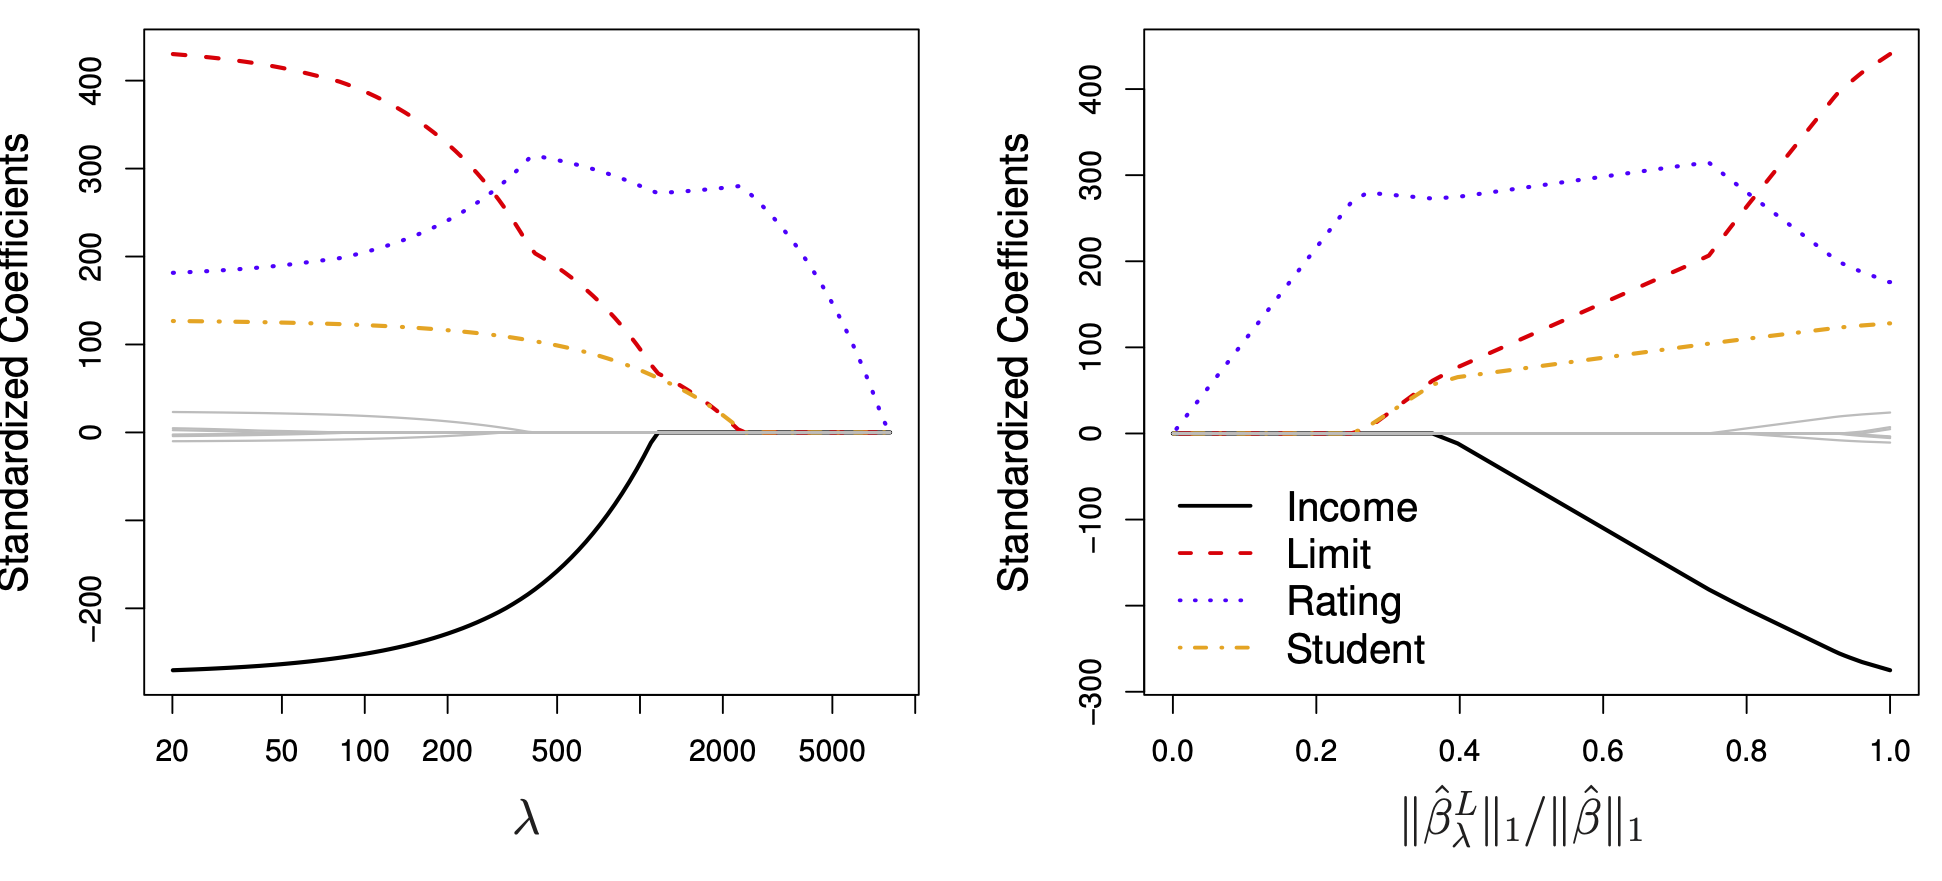

In [2]:
Image('LassoCoefs.png')

Example of standardized lasso coefficients as a function of $\lambda$ and $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{L} \big\|}}_{1} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{1}$

- The _$\ell_{1} norm$_ always decreases, and so does the $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{L} \big\|}}_{1} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{1}$.


- The quantity $\boldsymbol {\big\| \mathbf {\hat \beta_{\lambda}^{L} \big\|}}_{1} \boldsymbol{\le \big\| \mathbf {\hat \beta } \big \|}_{1}$ range from **one** when $\boldsymbol \lambda = 0$ (the case of OLS), to **zero** when $\boldsymbol \lambda= \infty$ (the null model where all the coefficient estimates are a vector of zeros, thus the _$\ell_{1} norm$_ will be equal to zero). 




- Depending on the value of $\lambda$, the lasso can produce a model involving any number of variables. 

- In contrast, ridge regression will always include all of the variables in the model, although the magnitude of the coefficient estimates will depend on $\lambda$.

## LASSO Regression Using SKLearn API 

- To perform **Lasso regression** you use the `Lasso` from `sklearn.linear_model` submodule. 

- **Lasso Regression** options: 
    - **alpha**: the regularization strength by which each parameter will be shrunk. (Default to 0)
    - **fit_intercept**: specify whether to fit the intercept. If the features are centered, then should be set to **False**.
    - **normalize**: to specify whether to normalize the features before regressing. If fit_intercept set to True, then this option will be ignored.
    
There are other options to use with this function, for more information check the documentation.

After fitting **lasso regression**, you may wish to see the estimated coefficients. The coefficients are attributes of ridge regression object and can be retrieved using `las_obj.coef_`.

```python 
# import Lasso from sklearn.linear_model
from sklearn.linear_model import Lasso

# Instantiate a ridge object
las_obj = Lasso(alpha = <a number or a range>,
          fit_intercept = True (False by default),
          normalize = True (False by default))

# Fit the ridge regression
las_obj.fit(X, y)

# Retrieve the coefficient attributes
las_obj.coef_

# Run help for more about ridge
help(Lasso)
#or 
?Lasso
```

### Lasso Regression with Train/Test Split

Often we split our data to build our machine learning model. Thus, after importing the data, we should always split it into train and test sets. The steps are similar to the previous steps but with few other steps to train and assess the model:

**Syntax**:

```python 
# import Lasso from sklearn.linear_model
from sklearn.linear_model import Lasso

# Import the data
my_data = pd.read_csv('some_data.csv')
X, y = my_data[features], my_data[targer]

# Split the data into train/test sets
X_train, X_test, y_train, y_test =\
                train_test_split(X, y, 
                test_size=0.20, 
                random_state=10123)

# Instantiate a ridge object with normalize set to True
lasso_reg = Lasso(alpha = 0,
          normalize = True)

# Fit the model on the training set
lasso_reg.fit(X_train, y_train)

# Generate predictions using the test set
preds = lasso_reg.predict(X_test)

# Evaluate the model using R^2
lasso_reg(X_test, y_test)

# Compute the MAE then print it the screen
from sklear.metrics import mean_absolute_error
print("The model MAE is: {:.5f}".format(mean_absolute_error(preds, y_test)))
```

### Lasso Parameters

To get the dictionary of the available parameters in Lasso, you use this command.

```python
lasso_obj.get_params()
```

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}